In [1]:
print('Hello World')

Hello World


In [2]:
import time
time.sleep(3)

In [3]:
def say_hello(recipient):
    return 'Hello, {}!'.format(recipient)
say_hello('Daniel')

'Hello, Daniel!'

In [4]:
import numpy as np
def square(x):
    return x*x

In [5]:
x=np.random.randint(1,10)
y=square(x)
print('%d squared is %d' % (x,y))

8 squared is 64


In [6]:
print('Is %d squared is %d?' % (x,y))

Is 8 squared is 64?


In [7]:
y=10

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [9]:
df=pd.read_csv('fortune500.csv')

In [10]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [11]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [12]:
df.columns=['year','rank','company','revenue','profit']

In [13]:
len(df)

25500

In [14]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [15]:
non_numberic_profits = df.profit.str.contains('[^0.9.-]')
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [16]:
set(df.profit[non_numberic_profits])
{'N.A.'}

{'N.A.'}

In [17]:
len(df.profit[non_numberic_profits])

25339

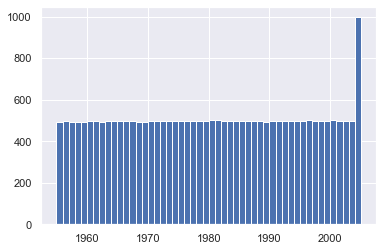

In [18]:
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955,2006))

In [19]:
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)

In [20]:
len(df)

161

In [21]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

In [22]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y = avgs.profit
def plot (x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x,y)
    ax.margins(x=0, y=0)

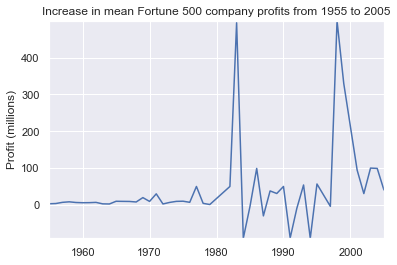

In [23]:
fig, ax = plt.subplots()
plot(x,y,ax,'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

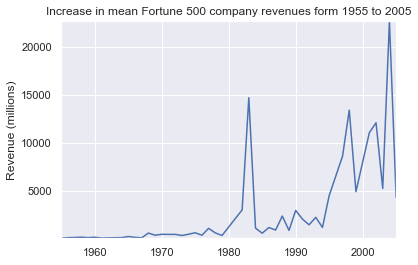

In [24]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x,y2,ax,'Increase in mean Fortune 500 company revenues form 1955 to 2005', 'Revenue (millions)')

In [25]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)
    fig, (ax1, ax2) = plt.subplots(ncols=2)
    title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
    stds1 = group_by_year.std().profit.as_matrix()
    stds2 = group_by_year.std().revenue.as_matrix()
    plot_with_std(x, y1.as_matrix(), stds1, ax1, title % 'profits','Profit (millions)')
    plot_with_std(x, y2.as_matrix(), stds2, ax2, title % 'revenues', 'Revenue (millions)')
    fig.set_size_inches(14, 4)
    fig.tight_layout()